<a href="https://colab.research.google.com/github/apurvakumbhar/Computer_vision/blob/main/Exp03.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:

from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


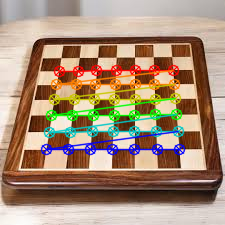

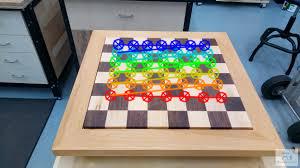

Camera matrix:
 [[150.08238195   0.         145.51857693]
 [  0.         109.32626864  69.22180326]
 [  0.           0.           1.        ]]
Distortion coefficients:
 [[ 0.02509224 -0.01791537 -0.0060923   0.00269217  0.00781647]]


In [2]:
import cv2
import numpy as np
import glob
from google.colab.patches import cv2_imshow # Import cv2_imshow

# Prepare object points (0,0,0), (1,0,0), ..., (6,5,0) # these are fixed in the real world (Z=0 for all since it's a flat board).
objp = np.zeros((6*7,3), np.float32) #You're creating the 3D object points corresponding to the checkerboard pattern (7 columns and 6 rows of inner corners).
objp[:,:2] = np.mgrid[0:7,0:6].T.reshape(-1,2) #generates a 2D grid of points from (0,0) to (6,5)

objpoints = []  # Will store 3D points (objp) for all images.
imgpoints = []  # Will store the corresponding 2D points detected from each image

# Load all images in the directory
images = glob.glob('/content/drive/MyDrive/CV/*.jpg') #Uses glob to load all .jpg files from the specified directory

for fname in images:
    img = cv2.imread(fname)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    ret, corners = cv2.findChessboardCorners(gray, (7,6), None) #looks for the 7×6 inner corners on the checkerboard.

    if ret:
        objpoints.append(objp)
        imgpoints.append(corners)

        cv2.drawChessboardCorners(img, (7,6), corners, ret)
        cv2_imshow(img) # Use cv2_imshow instead of cv2.imshow
        # cv2.waitKey(100) # waitKey is not needed with cv2_imshow

# cv2.destroyAllWindows() # destroyAllWindows is not needed with cv2_imshow

# Calibration
ret, mtx, dist, rvecs, tvecs = cv2.calibrateCamera(objpoints, imgpoints, gray.shape[::-1], None, None)

print("Camera matrix:\n", mtx)
print("Distortion coefficients:\n", dist)


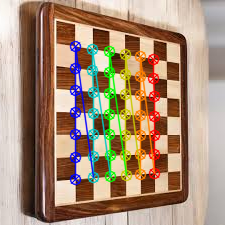

In [3]:
for fname in images:
    img = cv2.imread(fname)

    # Get image dimensions
    (h, w) = img.shape[:2]

    # Calculate center of the image
    center = (w // 2, h // 2)

    # Rotate the image by 90 degrees clockwise
    angle = -90  # negative for clockwise rotation
    scale = 1.0  # keep original scale

    # Get rotation matrix
    M = cv2.getRotationMatrix2D(center, angle, scale)

    # Perform the rotation
    rotated_img = cv2.warpAffine(img, M, (w, h))

    gray = cv2.cvtColor(rotated_img, cv2.COLOR_BGR2GRAY)

    ret, corners = cv2.findChessboardCorners(gray, (7,6), None)

    if ret:
        objpoints.append(objp)
        imgpoints.append(corners)

        cv2.drawChessboardCorners(rotated_img, (7,6), corners, ret)
        cv2_imshow(rotated_img)



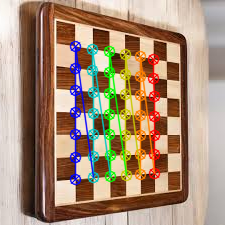

In [4]:
for fname in images:
    img = cv2.imread(fname)

    # Get image dimensions
    (h, w) = img.shape[:2]

    # Calculate center of the image
    center = (w // 2, h // 2)

    # Rotate the image by 90 degrees clockwise
    angle = -90  # negative for clockwise rotation
    scale = 1.0  # keep original scale

    # Get rotation matrix
    M = cv2.getRotationMatrix2D(center, angle, scale)

    # Perform the rotation
    rotated_img = cv2.warpAffine(img, M, (w, h))

    gray = cv2.cvtColor(rotated_img, cv2.COLOR_BGR2GRAY)

    ret, corners = cv2.findChessboardCorners(gray, (7,6), None)

    if ret:
        objpoints.append(objp)
        imgpoints.append(corners)

        cv2.drawChessboardCorners(rotated_img, (7,6), corners, ret)
        cv2_imshow(rotated_img)



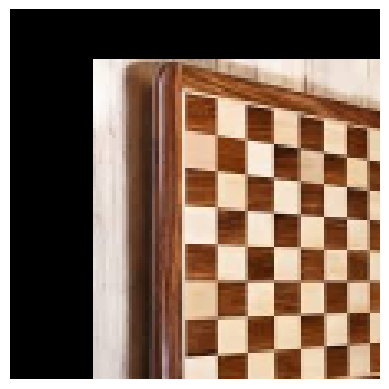

In [5]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load your image
img = cv2.imread('/content/drive/MyDrive/CV/chess2.jpg')
if img is None:
    raise ValueError("Image not found. Please check the file path.")

# Get image dimensions
h, w = img.shape[:2]
center = (w // 2, h // 2)

# Step 1: Rotate the image by 90 degrees clockwise
angle = -90
M_rot = cv2.getRotationMatrix2D(center, angle, 1.0)
rotated_img = cv2.warpAffine(img, M_rot, (w, h),
                             flags=cv2.INTER_LINEAR,
                             borderMode=cv2.BORDER_CONSTANT,
                             borderValue=(0, 0, 0))

# Step 2: Translate the image
tx, ty = 50, 30
M_trans = np.float32([[1, 0, tx],
                      [0, 1, ty]])
translated_img = cv2.warpAffine(rotated_img, M_trans, (w, h),
                                flags=cv2.INTER_LINEAR,
                                borderMode=cv2.BORDER_CONSTANT,
                                borderValue=(0, 0, 0))

# Step 3: Scale the image
scale_factor = 0.5
scaled_img = cv2.resize(translated_img, None, fx=scale_factor, fy=scale_factor,
                        interpolation=cv2.INTER_AREA)

# Step 4: Convert to grayscale
gray = cv2.cvtColor(scaled_img, cv2.COLOR_BGR2GRAY)

# Step 5: Find chessboard corners
pattern_size = (7, 6)  # Number of inner corners per chessboard row and column
ret, corners = cv2.findChessboardCorners(gray, pattern_size, None)

if ret:
    # Refine corner locations
    criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 30, 0.001)
    corners_refined = cv2.cornerSubPix(gray, corners, (11, 11), (-1, -1), criteria)

    # Draw the corners on the image
    cv2.drawChessboardCorners(scaled_img, pattern_size, corners_refined, ret)

# Step 6: Display the result using matplotlib
# Convert from BGR to RGB
scaled_img_rgb = cv2.cvtColor(scaled_img, cv2.COLOR_BGR2RGB)

plt.imshow(scaled_img_rgb)
plt.axis('off')  # Hide axes
plt.show()


